# Table of contents

1. [Business Understanding](#Business_Understanding)
2. [Data Understanding](#Data_Understanding)
3. [Prepare Data](#Prepare_Data)

# 1. Business Understanding

In this notebook I am using visualisation tools to assist me in trying to answer important questions about the
AirBnB listsing for London in 2020. The data that i am using is from the [Inside AirBnb](http://insideairbnb.com/get-the-data.html) website.

As AirBnB has become increasingly popular, I wanted to investigate the underlying data around the listings of the different properties within London and try to answer certain questions that could benefit both AirBnB and potential owners. I decided to look at the investigation from a certain point of view, I wanted to see if there was anything that could help the property owners in deciding whether to list their property and what could help in getting the best possible price, this would certainly help both the landlord and AirBnB. I wanted to select the most recent listings within 2020, even with the current situation facing London.

I will try and answer the following questions that could possible help any potential landloards and in turn promote more effienct listings for AirBnB:
* What types of verifications are hosts using?
* Which types of amenities are hosts using? Would they give a good review score?
* What could possibly an acceptable price?

[Link to business questions](#Business_Questions)


<a id='Data_Understanding'></a>
# 2. Data Understanding

### Importing Libraries

In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import dataframe_image as dfi
from ast import literal_eval

%matplotlib inline

### Loading Data

In [2]:
# Loading csv file into dataframe
df_listings = pd.read_csv('../data/raw/listings.csv', low_memory=False)

In [3]:
# Number of rows and columns in the dataframe
df_listings.shape

(77136, 74)

In [4]:
# Displaying all columns
pd.set_option('display.max_columns', None)

# show listings data sample
df_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20201216161425,2021-01-04,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,Not even 10 minutes by metro from Victoria Sta...,https://a0.muscache.com/pictures/b7afccf4-18e5...,43039,https://www.airbnb.com/users/show/43039,Adriano,2009-10-03,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",within an hour,100%,90%,f,https://a0.muscache.com/im/pictures/user/47773...,https://a0.muscache.com/im/pictures/user/47773...,Brixton,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"London, United Kingdom",Lambeth,NaN,51.46225,-0.11732,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,3.0,"[""Refrigerator"", ""Kitchen"", ""Crib"", ""Dedicated...",$105.00,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,3,33,63,338,2021-01-04,192,6,0,2010-03-21,2020-03-26,91.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,t,2,2,0,0,1.46
1,13913,https://www.airbnb.com/rooms/13913,20201216161425,2020-12-18,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,100%,75%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Islington, Greater London, United Kingdom",Islington,NaN,51.56802,-0.11121,Private room in apartment,Private room,2,NaN,1 shared bath,1.0,0.0,"[""Long term stays allowed"", ""Lock on bedroom d...",$40.00,1,29,1.0,1.0,29.0,29.0,1.0,29.0,NaN,t,30,60,90,365,2020-12-18,21,1,0,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,NaN,f,2,1,1,0,0.17
2,15400,https://www.airbnb.com/rooms/15400,20201216161425,2020-12-28,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",NaN,NaN,100%,f,https://a0.muscache.com/im/users/60302/profile...,https://a0.muscache.com/im/users/60302/profile...,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"London, United Kingdom",Kensington and Chelsea,NaN,51.48796,-0.16898,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Refrigerator"", ""Wifi"", ""Heating"", ""Dishes an...",$75.00,10,50,10.0,10.0,50.0,50.0,10.0,50.0,

In [5]:
# General statistics of the data
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.713600e+04,7.713600e+04,7.713600e+04,77095.000000,77095.000000,0.0,77136.000000,77136.000000,77136.000000,0.0,72284.000000,75992.000000,77136.000000,7.713600e+04,77135.000000,77135.000000,7.713500e+04,7.713500e+04,77135.000000,7.713500e+04,0.0,77136.000000,77136.000000,77136.000000,77136.000000,77136.000000,77136.000000,77136.000000,52965.000000,52902.000000,52911.000000,52855.000000,52904.000000,52856.000000,52855.000000,0.0,77136.000000,77136.000000,77136.000000,77136.000000,54705.000000
mean,2.598945e+07,2.020122e+13,9.675921e+07,24.170374,24.170374,NaN,51.510106,-0.128107,3.070006,NaN,1.488587,1.707811,5.180564,2.069624e+04,5.452855,6.908913,1.878365e+05,7.724969e+05,5.979946,7.222697e+05,NaN,11.320590,24.534757,38.320356,122.106046,15.283823,1.583891,0.045439,93.044652,9.525746,9.284270,9.649134,9.669231,9.557212,9.300974,NaN,20.686631,17.525993,2.618259,0.036559,0.607957
std,1.340272e+07,2.074232e+01,1.018449e+08,125.710654,125.710654,NaN,0.047450,0.094877,1.951961,NaN,0.884982,1.284529,22.401630,4.066635e+06,23.192706,30.399336,1.937087e+07,4.037594e+07,25.947365,3.774108e+07,NaN,13.215171,26.900944,40.683909,144.228420,35.440263,4.581973,0.319414,10.531457,1.033406,1.186098,0.931390,0.929136,0.869663,1.077889,NaN,98.922987,96.070725,16.523581,0.509314,0.865626
min,1.155100e+04,2.020122e+13,2.010000e+03,0.000000,0.000000,NaN,51.292570,-0.496870,0.000000,NaN,1.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.526581e+07,2.020122e+13,1.627615e+07,1.000000,1.000000,NaN,51.484497,-0.188510,2.000000,NaN,1.000000,1.000000,1.000000,3.100000e+01,1.000000,1.000000,9.000000e+01,9.000000e+01,1.000000,9.000000e+01,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.110000
50%,2.623901e+07,2.020122e+13,4.997764e+07,1.000000,1.000000,NaN,51.514230,-0.126040,2.000000,NaN,1.000000,1.000000,2.000000,1.125000e+03,2.000000,2.000000,1.125000e+03,1.125000e+03,2.000000,1.125000e+03,NaN,0.000000,3.000000,13.000000,57.000000,3.000000,0.000000,0.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,1.000000,0.000000,0.320000
75%,3.816095e+07,2.020122e+13,1.558912e+08,3.000000,3.000000,NaN,51.539340,-0.069387,4.000000,NaN,2.000000,2.000000,3.000000,1.125000e+03,4.000000,4.000000,1.125000e+03,1.125000e+03,4.000000,1.125000e+03,NaN,28.000000,58.000000,88.000000,262.000000,14.000000,1.000000,0.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,4.000000,2.000000,1.000000,0.000000,0.780000
max,4.707231e+07,2.020122e+13,3.803358e+08,3450.000000,3450.000000,NaN,51.679980,0.288570,16.000000,NaN,50.000000,50.000000,1125.000000,1.000000e+09,1125.000000,1125.000000,2.147484e+09,2.147484e+09,1125.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,817.000000,479.000000,22.000000,100.000000,10.000000,10.

In [6]:
# Dataframe columns information
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77136 entries, 0 to 77135
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            77136 non-null  int64  
 1   listing_url                                   77136 non-null  object 
 2   scrape_id                                     77136 non-null  int64  
 3   last_scraped                                  77136 non-null  object 
 4   name                                          77112 non-null  object 
 5   description                                   74048 non-null  object 
 6   neighborhood_overview                         47437 non-null  object 
 7   picture_url                                   77136 non-null  object 
 8   host_id                                       77136 non-null  int64  
 9   host_url                                      77136 non-null 

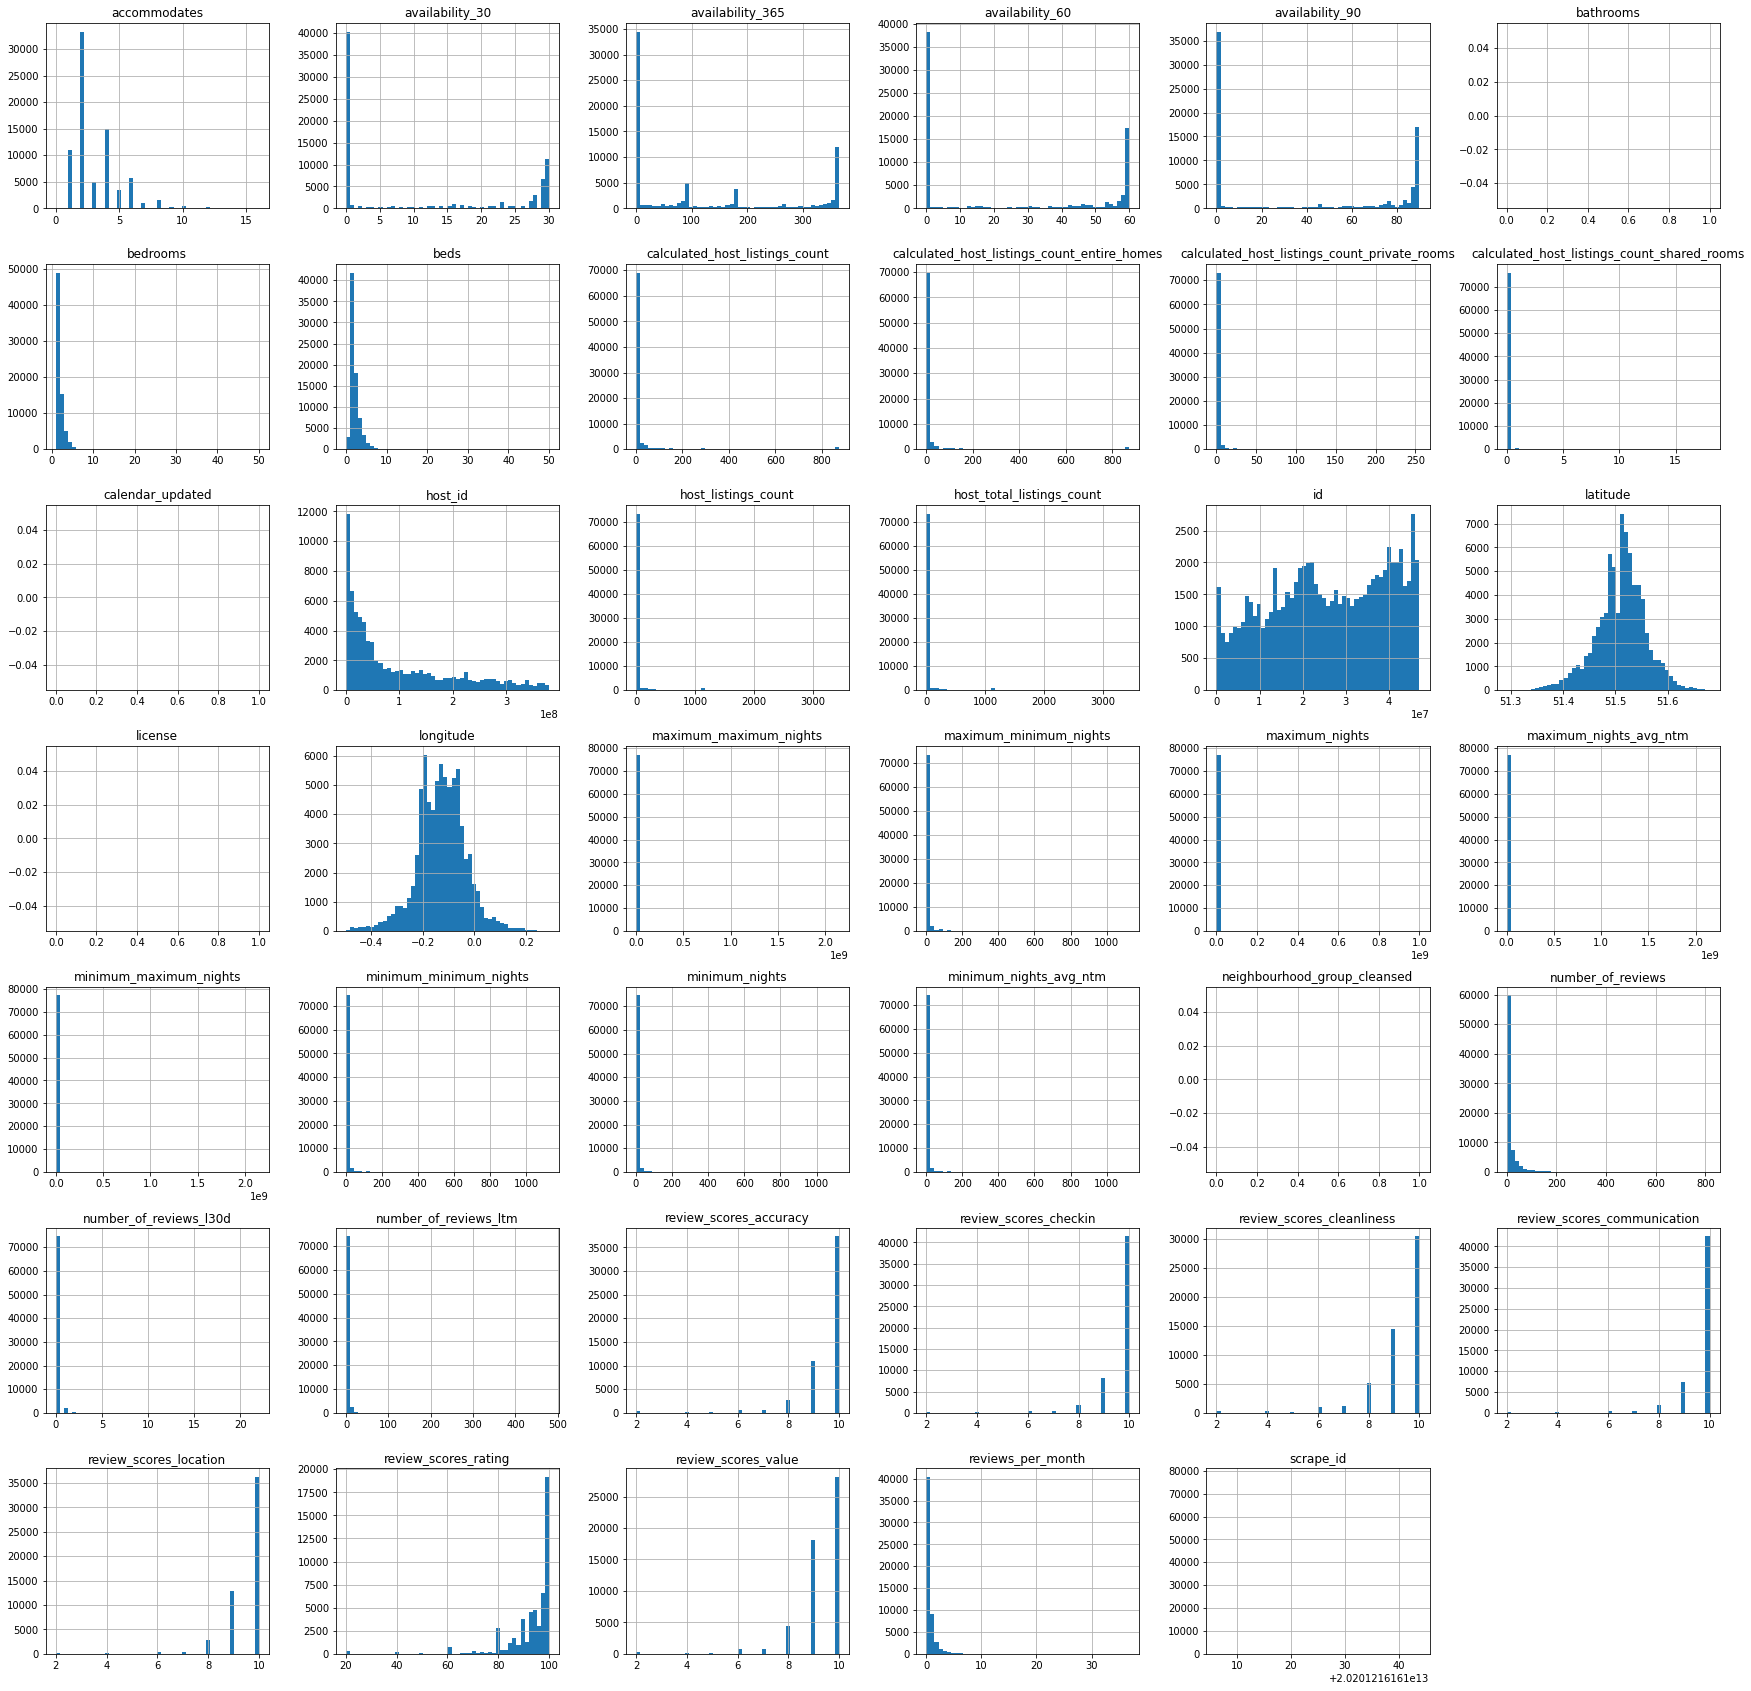

In [7]:
# Checking the distribution of all variables
df_listings.hist(bins=50, figsize=(30,30))
plt.show()

In [8]:
# Finding the columns with more than 75% of values missing
set(df_listings.columns[df_listings.isnull().mean()>0.75])

{'bathrooms', 'calendar_updated', 'license', 'neighbourhood_group_cleansed'}

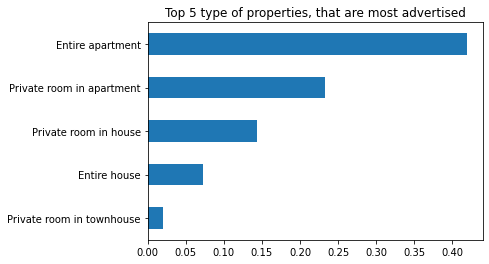

In [9]:
# Exploring the data for number of property types
neighbourhood_vals = df_listings['property_type'].value_counts()

((neighbourhood_vals[0:5]/df_listings.shape[0]).sort_values()).plot(kind="barh");
plt.title("Top 5 type of properties, that are most advertised");

In [10]:
# Checking the property type count above 100
neighbourhood_vals[df_listings['property_type'].value_counts() > 100]

Entire apartment                     32292
Private room in apartment            17926
Private room in house                11111
Entire house                          5618
Private room in townhouse             1529
Entire condominium                    1349
Entire serviced apartment             1026
Entire townhouse                       963
Private room in condominium            656
Private room in bed and breakfast      538
Room in boutique hotel                 458
Entire loft                            428
Room in hotel                          303
Shared room in apartment               294
Room in serviced apartment             293
Private room in loft                   244
Private room in guest suite            189
Entire guest suite                     176
Private room in guesthouse             174
Shared room in house                   131
Entire guesthouse                      121
Room in aparthotel                     118
Room in hostel                         109
Private roo

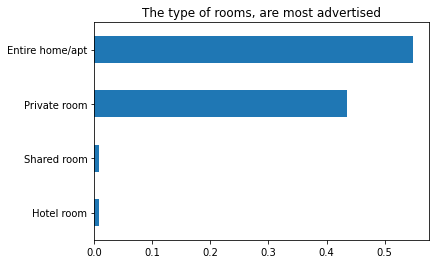

In [11]:
# Exploring the data for number of room types
room_vals = df_listings['room_type'].value_counts()

((room_vals/df_listings.shape[0]).sort_values()).plot(kind="barh");
plt.title("The type of rooms, are most advertised");

In [12]:
# Exploring the data of bathrooms_text
df_listings['bathrooms_text'].value_counts()

1 bath               32520
1 shared bath        14028
2 baths               9175
1 private bath        6014
1.5 baths             5077
1.5 shared baths      3637
2.5 baths             1909
2 shared baths        1367
3 baths               1154
3.5 baths              460
2.5 shared baths       346
4 baths                230
3 shared baths         167
0 shared baths         164
0 baths                154
Half-bath              107
Shared half-bath       105
4.5 baths               91
5 baths                 46
3.5 shared baths        36
Private half-bath       22
6 baths                 21
4 shared baths          20
5.5 baths               20
6 shared baths          19
10 baths                18
6.5 baths                8
4.5 shared baths         8
5 shared baths           7
7 baths                  5
8 baths                  4
8 shared baths           3
7 shared baths           2
8.5 baths                2
7.5 baths                2
17 baths                 1
11.5 baths               1
9

<a id='Prepare_Data'></a>
# 3. Prepare Data

In [13]:
class format_data:
    
    """
    Class for applying a new format to the numerical columns so that they can be explored
    
    data_float function converts object to float
    data_percentage function converts object to percentage
    text_to_int function converts object to integer
    
    Parameters:
    
    Dataframe, "column name"
    
    Returns:
    
    Dataframe
    
    """
    
    def __init__(self, dataframe):
        self.dataframe = dataframe
        
    def data_float(self):
        self = self.str.replace('$', '', regex=True).replace(',', '', regex=True).astype(float)
        
        return self
    
    def data_percentage(self):
        self = (self.str.replace('%', '', regex=True).astype('float')) / 100
        
        return self
    
    def text_to_int(self):
        self = self.str.split(' ').str[0].replace('Half-bath', '0.5', regex=True) \
                                         .replace('Shared', '0.5', regex=True) \
                                         .replace('Private', '1', regex=True).astype('float')
              
        return self

In [14]:
# Function for finding outliers
def find_outliers(df_listings, column_name):
    
    """
    The function finds outliers and removes them
    from the dataframe.
    
    Parameters:
    
    Dataframe, column_name
    
    Returns:
    
    Dataframe
    
    """
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(df_listings[column_name], 25)
    
    #Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(df_listings[column_name],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    #print("Data points considered outliers for the feature '{}':".format("price"))
    filtered_data = df_listings[~((df_listings[column_name] >= Q1 - step) & 
                                  (df_listings[column_name] <= Q3 + step))].sort_values(by=[column_name])
    
    return filtered_data

In [15]:
# Applying format to the price column
float_list = ['price']
for x in float_list:
    df_listings[x] = format_data.data_float(df_listings[x])

In [16]:
# Applying format to the host_response_rate and host_acceptance_rate column
percentage_list = ['host_response_rate','host_acceptance_rate']
for x in percentage_list:
    df_listings[x] = format_data.data_percentage(df_listings[x])

In [17]:
# Applying format to the bathrooms_text column
text_list = ['bathrooms_text']
for x in text_list:
    df_listings[x] = format_data.text_to_int(df_listings[x])

In [18]:
# Renaming columns
df_listings.rename(columns={'bathrooms_text': 'bathrooms_shared'}, inplace=True)

In [19]:
# Checking the data is unique for the bathrooms_text
df_listings['bathrooms_shared'].value_counts()

1.0     52584
2.0     10542
1.5      8714
2.5      2255
3.0      1321
3.5       496
0.0       318
4.0       250
0.5       212
4.5        99
5.0        53
6.0        40
5.5        20
10.0       18
6.5         8
8.0         7
7.0         7
9.0         2
8.5         2
7.5         2
35.0        1
11.0        1
17.0        1
11.5        1
10.5        1
12.0        1
Name: bathrooms_shared, dtype: int64

In [20]:
# checking the data is unique for the bedrooms
df_listings['bedrooms'].value_counts()

1.0     49020
2.0     15261
3.0      5196
4.0      1979
5.0       619
6.0       142
7.0        35
8.0        14
10.0        6
11.0        3
9.0         3
12.0        2
19.0        1
16.0        1
22.0        1
50.0        1
Name: bedrooms, dtype: int64

### Removing Outliers

In [21]:
# Applying the find_outliers function 
outliers = find_outliers(df_listings, "price").index
                                  
df_listings = df_listings.drop(df_listings.index[outliers]).reset_index(drop = True)

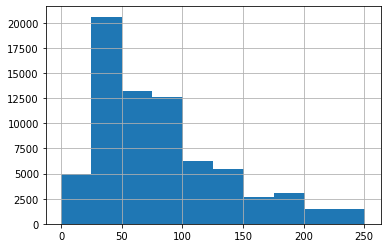

In [22]:
# Checking the new distribution of prices
df_listings["price"].hist()

<a id='Business_Questions'></a>
### Business Questions

<a id='Business_Questions'></a>

In [23]:
def chart_plot(data, x_label, y_label):
    
    """
    Function creates a plot
    
    """
    
    plt.figure(figsize=(10,5))

    sns.set(style="whitegrid")
    chart = sns.barplot(x=x_label, y=y_label, data=data)

    chart.set_xticklabels(
        chart.get_xticklabels(), 
        rotation=60, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='medium', 
        rotation_mode='anchor'
    )

In [24]:
PROJECT_ROOT_DIR = "."
PROJECT_NAME = "AirBnB-London-2020"
IMAGES_PATH = "../reports/figures/"

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    
    """
    Saving image as a png file
    
    """
    
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [25]:
def type_grouping(column):
    
    """
    Create dictionary count
    
    Parameters:
    
    Column name
    
    Returns:
    
    Dictionary
    
    """
    
    verifications_dict = {}
    temp = []

    for i in column:
        temp.append(eval(i))
    
    for i in temp:
        try:
            for j in i:
                if j not in verifications_dict:
                    verifications_dict[j] = 1
                else:
                    verifications_dict[j] += 1
        except:
            continue
            
    return verifications_dict

#### What is the spread of prices using the map of London map? Prices by all year availability?

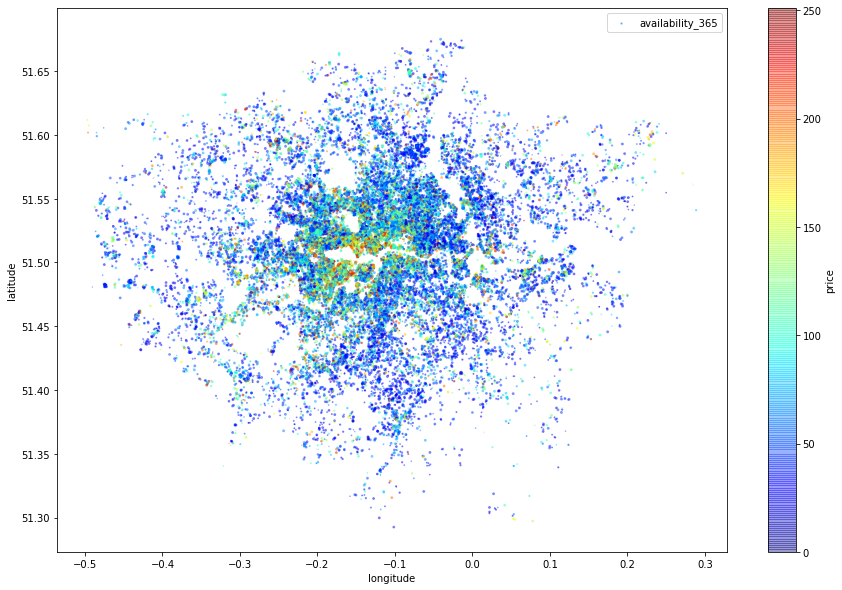

In [26]:
# Initial map of London prices by all year availability
df_listings.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(15,10),
                 s=(df_listings["availability_365"])/100, label="availability_365", 
                 c="price", cmap=plt.get_cmap('jet'), 
                 colorbar=True,
                 sharex=False)
plt.show()

Saving figure availability_365_prices_scatterplot


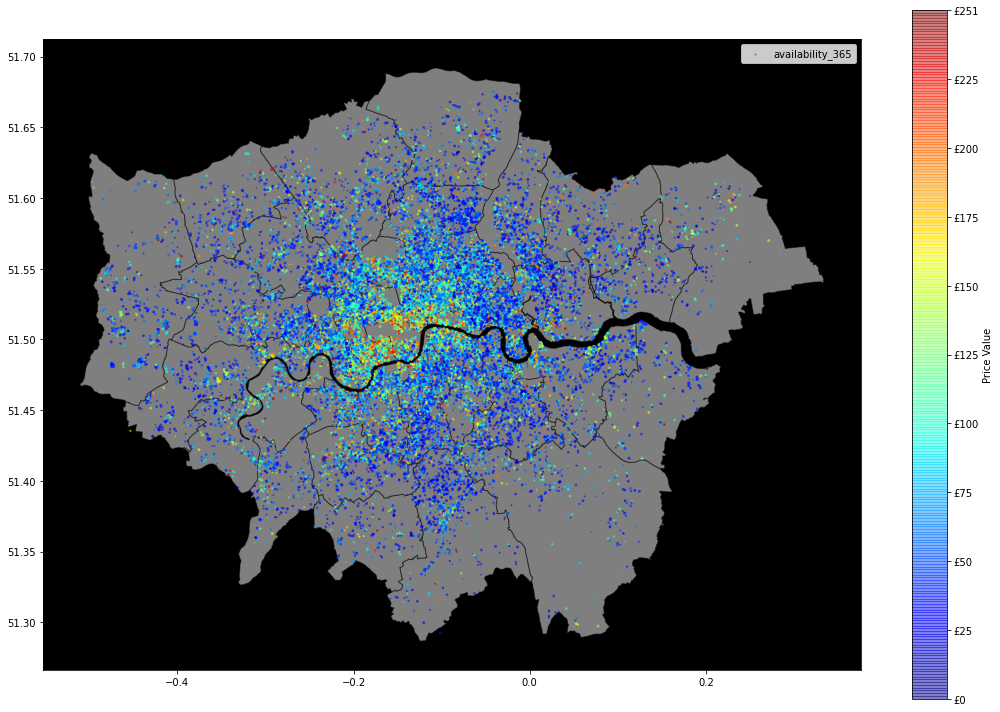

In [27]:
# Completed map of London prices by all year availability
fig, ax = plt.subplots(1, 1, figsize=(15,10))

basemap = gpd.read_file('../data/external/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')
basemap = basemap.to_crs(epsg=4326)

basemap = basemap.plot(alpha=0.5, edgecolor='k',color='White',figsize=(15,10),ax=ax)
basemap.set_facecolor('black')


x, y = df_listings['longitude'].values, df_listings['latitude'].values
basemap.scatter(x,y, alpha=0.5,
                 s=(df_listings["availability_365"])/100, label="availability_365", 
                 c=df_listings["price"], cmap=plt.get_cmap('jet'))


sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('jet'))
prices = df_listings["price"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = fig.colorbar(sm, ticks=tick_values/prices.max(), alpha=0.5)
cbar.ax.set_yticklabels(["£%d"% v for v in tick_values], fontsize=10)
cbar.set_label('Price Value', fontsize=10)

plt.legend(fontsize=10)
save_fig("availability_365_prices_scatterplot")
plt.show()

* What is the average price of the listings, for the different location within London?

In [28]:
# Selecting data where there is a price
price_df = df_listings[df_listings['price'].isnull() == False]

In [29]:
# Showing the top 5 London boroughs by count of listings
price_df['neighbourhood_cleansed'].value_counts()[:5]

Westminster               7218
Tower Hamlets             6659
Hackney                   5592
Camden                    4836
Kensington and Chelsea    4359
Name: neighbourhood_cleansed, dtype: int64

In [30]:
# Grouping data by the London borough and calculating the average price
nb_price_avg = price_df.groupby('neighbourhood_cleansed', as_index=False).mean()
nb_price_avg = pd.DataFrame(nb_price_avg).sort_values(by='price', ascending=False)

In [31]:
# Rename the columns 
nb_price_avg = nb_price_avg.rename(columns={'neighbourhood_cleansed':'London Broughs','price': 'Avg Price'})

Saving figure Neighbourhood_av_price_histogram_plots


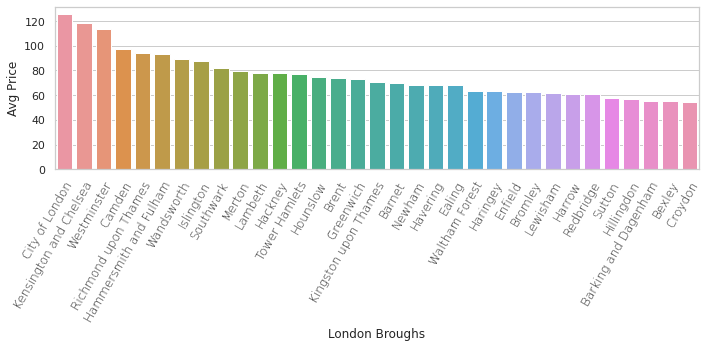

In [32]:
# Applying the chart function and saving the image
chart_plot(nb_price_avg,"London Broughs", "Avg Price")
save_fig("Neighbourhood_av_price_histogram_plots")

#### What types of verifications are hosts using? How long did it take them to respond?

In [33]:
# Removing host_verifications with null values
verifications_df = df_listings[df_listings['host_verifications'].isnull() == False] 

# Removing host_verifications with empyty lists
verifications_df = verifications_df[verifications_df['host_verifications'] != '[]']

In [34]:
# Applying the grouping function
verifications_types = type_grouping(verifications_df['host_verifications'])

In [35]:
# Calculating the percentage of Verification Type in the listings
for k,v in verifications_types.items():
    verifications_types[k] = round(v / verifications_df.shape[0] * 100, 3)

In [36]:
# Creating Verification type dataframe
verifications_types = pd.DataFrame.from_dict(verifications_types,orient='index',columns=['A']).reset_index()
verifications_types = verifications_types.rename(columns={'index':'Verification Type','A': '% of listings'})
top10_verifications_types = verifications_types.sort_values(by='% of listings', ascending=False)[:10]

Saving figure Verification_type_price_histogram_plots


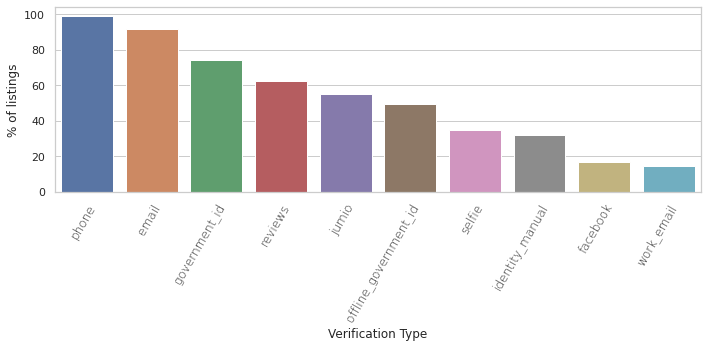

In [37]:
# Creating Verification Type chart and saving to png file
chart_plot(top10_verifications_types,"Verification Type", "% of listings")
save_fig("Verification_type_price_histogram_plots")

#### What amenities are most used and does the amenity affect the review? 

In [38]:
# creating amenities dataframe
df_left = df_listings[['id','amenities']]

In [39]:
# Removing null values
df_left = df_left[df_left['amenities'].notnull()]

In [40]:
# Creating review score dataframe
df_right = df_listings[['id','review_scores_value']]

In [41]:
# Expanding the amenities column
df_left['amenities'] = df_left['amenities'].apply(literal_eval)
df_left = df_left.explode('amenities')

In [42]:
# Merging the custom amenities dataframe with
# the review score dataframe
result = pd.merge(df_left, df_right, on='id')

In [43]:
# Grouping the results by aggregation
result = result.groupby('amenities').agg({'review_scores_value': ['count', 'min', 'max', 'mean']})

In [44]:
# Reseting the index
result = result.reset_index()

In [45]:
# Confirm the layout
result.head().columns

MultiIndex([(          'amenities',      ''),
            ('review_scores_value', 'count'),
            ('review_scores_value',   'min'),
            ('review_scores_value',   'max'),
            ('review_scores_value',  'mean')],
           )

In [46]:
# Renaming the columns by adding the aggregation and
# sorting by the values
result = result.sort_values(by=[('review_scores_value', 'mean'),
                                ('review_scores_value',  'min'),
                                ('review_scores_value',  'max')], ascending=False)

In [47]:
# Removing the "_" from the column name
result.columns = ["_".join(x) for x in result.columns.ravel()]

In [48]:
# Checking the column names
result.head().columns

Index(['amenities_', 'review_scores_value_count', 'review_scores_value_min',
       'review_scores_value_max', 'review_scores_value_mean'],
      dtype='object')

In [49]:
# # Renaming the columns
result.rename(columns={"amenities_":"Amenities", 
                       "review_scores_value_count":"Count Listings",
                       "review_scores_value_min":"Review Min Value",
                       "review_scores_value_max":"Review Max Value",
                       "review_scores_value_mean":"Review Avg Value"}, inplace=True)

In [50]:
# Confirming the layout
result.head()

,Amenities,Count Listings,Review Min Value,Review Max Value,Review Avg Value
2,"14"" TV with Netflix, standard cable",1,10.0,10.0,10.0
4,"19"" HDTV with Netflix, premium cable, Roku",1,10.0,10.0,10.0
5,"20"" HDTV with standard cable",1,10.0,10.0,10.0
9,"28"" HDTV with Netflix, standard cable",1,10.0,10.0,10.0
10,"30"" TV",2,10.0,10.0,10.0


In [51]:
# Filtering the results where count of listings
# is greater than 10
result = result[result['Count Listings'] > 10]

In [52]:
# Formating the results dataframe
result = result.head(20).style.background_gradient() \
               .format({"Amenities": lambda x:x.lower()}) \
               .format({"Review Min Value": "{:20,.2f}"}) \
               .format({"Review Max Value": "{:20,.2f}"}) \
               .format({"Review Avg Value": "{:20,.2f}"}) \
               .hide_index()\
               .background_gradient(cmap='Blues')

In [53]:
# Continued formatting
result.set_properties(subset=["Amenities", 
                              "Count Listings", 
                              "Review Min Value", 
                              "Review Max Value", 
                              "Review Avg Value"], **{'text-align': 'left'}) \
      .set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

Amenities,Count Listings,Review Min Value,Review Max Value,Review Avg Value
stainless steel gas stove,21,8.00,10.00,9.81
cleaning products,29,9.00,10.00,9.79
pets allowed,28,9.00,10.00,9.75
clothing storage,11,9.00,10.00,9.73
record player,46,6.00,10.00,9.72
self check-in,158,8.00,10.00,9.71
electric stove,52,8.00,10.00,9.69
bathroom essentials,279,8.00,10.00,9.68
bedroom comforts,279,8.00,10.00,9.68
full kitchen,210,8.00,10.00,9.66


In [54]:
# Exporting the amenities image to a png file
dfi.export(result, '../reports/figures/top_amenities.png')

# Conclusion

### **What types of verifications are hosts using?**
Looking at the security verifications I want to see what the different types were and how many were associated with the listings. The data seems to show that phone calls, emails and "government id" were in the top 3. About 70% of the listings had a "government id" as one of the verifications and in my mind that would be suitable, especially if you're letting someone into your property that you do not know.

### **Which types of amenities are hosts using? Would they give a good review score?**
Now with amenities these are the items that you would hope would make a guest enjoy their stay and in turn give you an outstanding review. The table below shows the amenities by the number of listings with the calculated minimum, maximum and average review value. The top 20 amenities seem to show that luxuries certainly do help with the average review and having the option for allowing pets i.e. dogs also helps.

### **What could possibly an acceptable price?**
My first thoughts with the price was to look at the data from a view of the London boroughs. Was there any areas within London that were the most expensive? or was there an even spread of the prices.

When initially viewing the London map, it shows that the majority of the prices that range from £111 to £223 are within the central/west, which would presume that the borough of Westminster would be one of the most expensive. The lower prices are evenly spread throughout London which would confirm that these properties would be more affordable.

The average price for the different boroughs shows that the City of London, Kensington and Chelsea, and also Westminster are the top 3 boroughs with the largest average price.

# Next Steps

In my next notebook, I will be conducting a model evaluation to try to predict the price per night for a property